In [5]:
freqs1=np.load(r"C:\Users\Stef\Desktop\003795-anonymous_measurement-stef-1.exdir\S-parameter\parameters\0\data.npy")
data2=np.load(r"C:\Users\Stef\Desktop\003795-anonymous_measurement-stef-1.exdir\S-parameter\data\data.npy")

In [6]:
freqs2=np.load(r"C:\Users\Stef\Desktop\003911-anonymous_measurement-stef-2.exdir\S-parameter\parameters\0\data.npy")
data2=np.load(r"C:\Users\Stef\Desktop\003911-anonymous_measurement-stef-2.exdir\S-parameter\data\data.npy")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import special 

[5.000e+09 5.250e+09 5.500e+09 5.750e+09 6.000e+09 6.250e+09 6.500e+09
 6.750e+09 7.000e+09 7.250e+09 7.500e+09 7.750e+09 8.000e+09 8.250e+09
 8.500e+09 8.750e+09 9.000e+09 9.250e+09 9.500e+09 9.750e+09 1.000e+10
 1.025e+10 1.050e+10 1.075e+10 1.100e+10]


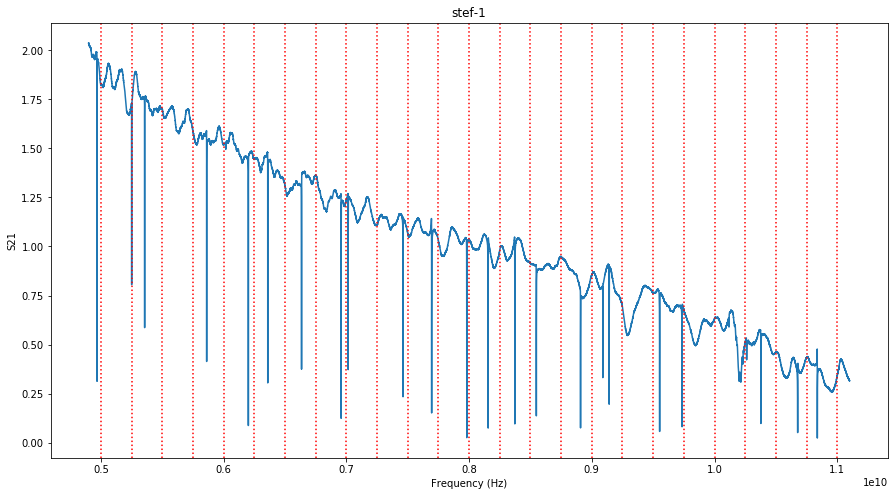

In [129]:
fig = plt.figure(figsize=(15,8))
plt.xlabel('Frequency (Hz)')
plt.ylabel('S21')
plt.title('stef-1')
plt.plot(freqs1,np.abs(data2))

x = np.linspace(5e9, 11e9, 25)
print(x)
for i in x:
    plt.axvline(i, color='r', linestyle=':')
#plt.axvline(8.75e9, color='b')
plt.show()


[5.000e+09 5.250e+09 5.500e+09 5.750e+09 6.000e+09 6.250e+09 6.500e+09
 6.750e+09 7.000e+09 7.250e+09 7.500e+09 7.750e+09 8.000e+09 8.250e+09
 8.500e+09 8.750e+09 9.000e+09 9.250e+09 9.500e+09 9.750e+09 1.000e+10
 1.025e+10 1.050e+10 1.075e+10 1.100e+10]


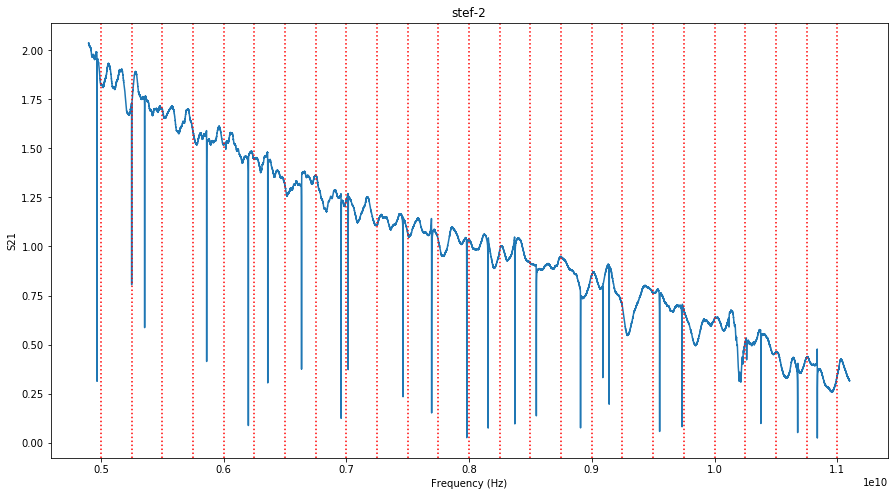

In [130]:
fig = plt.figure(figsize=(15,8))
plt.xlabel('Frequency (Hz)')
plt.ylabel('S21')
plt.title('stef-2')

plt.plot(freqs2,np.abs(data2))

x = np.linspace(5e9, 11e9, 25)
print(x)
for i in x:
    plt.axvline(i, color='r', linestyle=':')
#plt.axvline(8.75e9, color='b')
plt.show()

In [4]:
df = pd.read_excel (r'C:\Users\Stef\Documents\Documenten\Master\Project Russia\Resonator design\Resonator sample 1\Design parameters resonator sample 1.xlsx', sheet_name='5x5')
#print (df)
df2=df.as_matrix()
data = df2[0:25, 0:10]
measured_data1 = df2[0:25, 11:17]
measured_data2 = df2[26:51, 11:17]

data_position = data[:,0]
data_ws = data[:,1]
data_hd = data[:,2]
data_w = data[:,3]
data_s = data[:,4]
data_w2s = data[:,8]
data_f = data[:,9]

measured_data1_f = measured_data1[:,0]
measured_data1_Qi_lp = measured_data1[:,3]
measured_data1_Qe = measured_data1[:,1]

measured_data2_f = measured_data2[:,0]
measured_data2_Qi_lp = measured_data2[:,3]
measured_data2_Qe = measured_data2[:,1]

print((measured_data2_f))

[4968800183.0 5250579313.0 5356421837.0 nan 5861785633.0 6201643298.0
 6359495490.0 6635005755.0 6957408091.0 7014877698.0 7461869771.0
 7694789305.0 7981169853.0 8155643051.0 8372600845.0 8547958666.0
 8908208625.0 9089766635.0 9141640350.0 9552638839.0 9735570960.0 nan
 10377624268.0 10677628379.0 10837403487.0]


C:\Users\Stef\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[9.428090333333333 16.56854204727896 4.142136374579918 5.0
 8.284272749159836 5.224078693601694 4.714045333333334 10.448157387203388
 3.3333333333333335 11.715730773757592 11.715728538507468 20.0
 6.666666666666667 5.857865593985615 5.857864269253734 7.387962874757814
 10.0 2.612039346800847 8.284271316532694 3.6939815679808743
 23.431457077014937 13.333333333333334 7.071068]
mean SD: 30071.680433063397


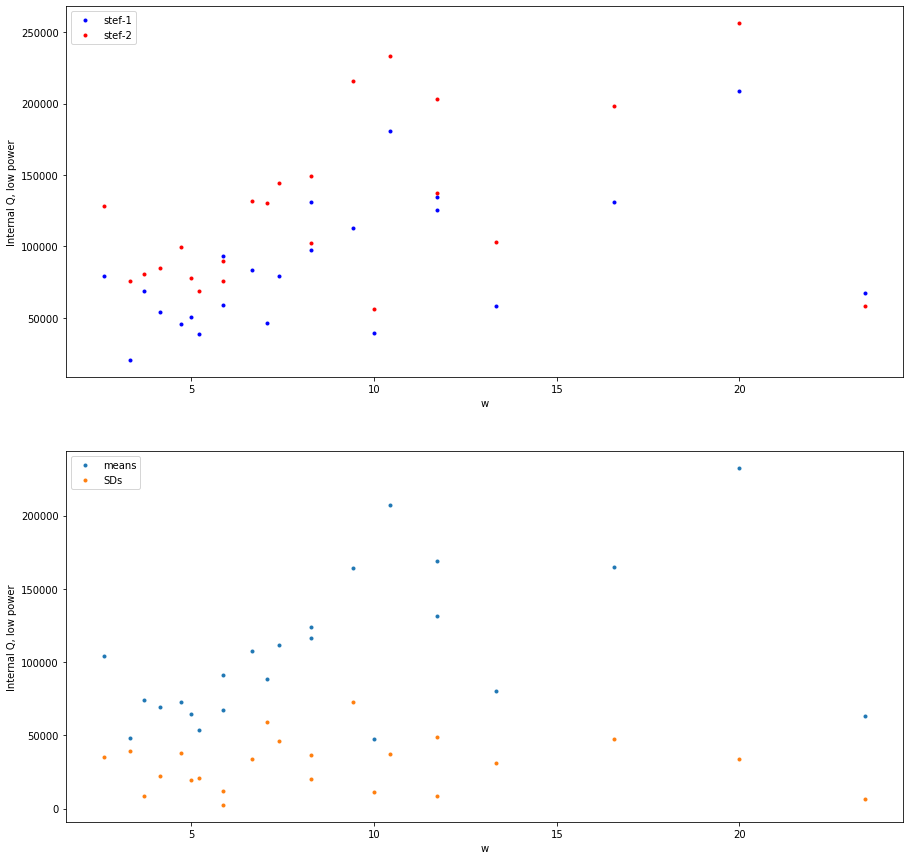

In [77]:
#some statistical analysis
data2_Qi = np.delete(measured_data2_Qi_lp, 21)
data1_Qi = np.delete(measured_data1_Qi_lp, 21)
data2_Qi = np.delete(data2_Qi, 3,0)
data1_Qi = np.delete(data1_Qi, 3,0)
w = np.delete(data_w, 21)
w = np.delete(w, 3)
print(w)
#means:
mean_Qi_lp = (data1_Qi + data2_Qi)/2
sd_Qi_lp = np.zeros(len(mean_Qi_lp))
for i in range(len(mean_Qi_lp)):
    sd_Qi_lp[i] = np.sqrt((data1_Qi[i] - mean_Qi_lp[i])**2 + (data2_Qi[i] - mean_Qi_lp[i])**2) #sample SD, not population SD!
se = sd_Qi_lp/np.sqrt(2)
print('mean SD:', np.mean(sd_Qi_lp))


fig, (ax1, ax2) = plt.subplots(2 , 1, figsize=(15,15))
ax1.plot(w, data1_Qi, 'b.', label='stef-1')
ax1.plot(w, data2_Qi, 'r.', label='stef-2')
ax2.plot(w, mean_Qi_lp, '.', label='means')
ax2.plot(w, sd_Qi_lp, '.', label='SDs')
#ax2.plot(w, se, '.', label='SE of the mean')
ax1.set(ylabel = 'Internal Q, low power', xlabel = 'w')
ax2.set(ylabel = 'Internal Q, low power', xlabel = 'w')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

mean losses: [6.74649864079986e-06 6.340191864098445e-06 1.5155449346725647e-05
 1.630409637670066e-05 8.459522517978018e-06 2.017581911952485e-05
 1.591254105054671e-05 4.905920900296925e-06 3.1139031317018295e-05
 6.176130132669573e-06 7.630352375374503e-06 4.34592079213324e-06
 9.765817902261414e-06 1.0944267308039543e-05 1.5078154236983201e-05
 9.783252908275764e-06 2.1568309505695582e-05 1.0201413110944254e-05
 8.715198362461218e-06 1.3521528909045502e-05 1.5970510189516784e-05
 1.343768830083703e-05 1.4660844202085582e-05]
mean SD: 4.3902798275987285e-06
mean SD/mu: 0.30512252013874314


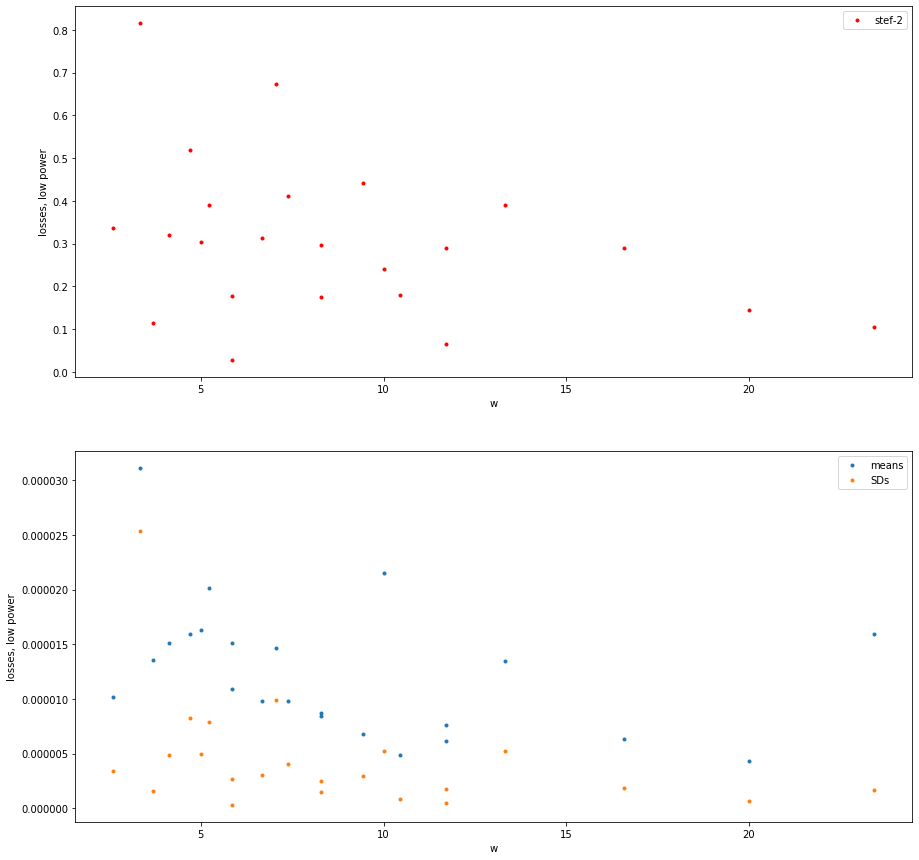

In [95]:
#some statistical analysis
data2_Qi = np.delete(measured_data2_Qi_lp, 21)
data1_Qi = np.delete(measured_data1_Qi_lp, 21)
data2_Qi = np.delete(data2_Qi, 3,0)
data1_Qi = np.delete(data1_Qi, 3,0)
loss1 = 1/data1_Qi
loss2 = 1/data2_Qi
w = np.delete(data_w, 21)
w = np.delete(w, 3)

#means:
mean_loss = (loss1 + loss2)/2
sd_loss = np.zeros(len(mean_loss))
for i in range(len(mean_loss)):
    sd_loss[i] = np.sqrt((loss1[i] - mean_loss[i])**2 + (loss2[i] - mean_loss[i])**2)
#se = sd_loss/np.sqrt(2)

print('mean losses:', mean_loss)
print('mean SD:', np.mean(sd_loss))
print('mean SD/mu:', np.mean(sd_loss/mean_loss))

fig, (ax1, ax2) = plt.subplots(2 , 1, figsize=(15,15))
#ax1.plot(w, loss1, 'b.', label='stef-1')
ax1.plot(w, sd_loss/mean_loss, 'r.', label='stef-2')
ax2.plot(w, mean_loss, '.', label='means')
ax2.plot(w, sd_loss, '.', label='SDs')
#ax2.plot(w, se, '.', label='SE of the mean')
ax1.set(ylabel = 'losses, low power', xlabel = 'w')
ax2.set(ylabel = 'losses, low power', xlabel = 'w')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

mean losses: [6.74649864079986e-06 6.340191864098445e-06 1.5155449346725647e-05
 1.630409637670066e-05 8.459522517978018e-06 2.017581911952485e-05
 1.591254105054671e-05 4.905920900296925e-06 3.1139031317018295e-05
 6.176130132669573e-06 7.630352375374503e-06 4.34592079213324e-06
 9.765817902261414e-06 1.0944267308039543e-05 1.5078154236983201e-05
 9.783252908275764e-06 2.1568309505695582e-05 1.0201413110944254e-05
 8.715198362461218e-06 1.3521528909045502e-05 1.5970510189516784e-05
 1.343768830083703e-05 1.4660844202085582e-05]
mean SD: 4.3902798275987285e-06
mean SD/mu: 0.30512252013874314


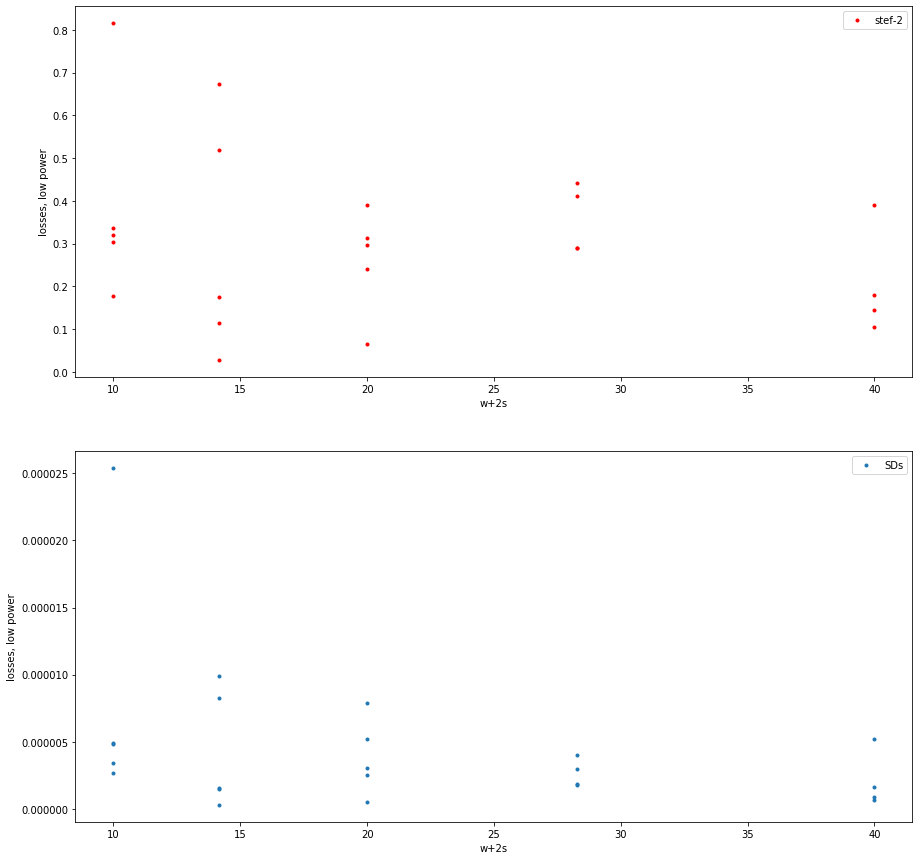

In [88]:
#some statistical analysis
data2_Qi = np.delete(measured_data2_Qi_lp, 21)
data1_Qi = np.delete(measured_data1_Qi_lp, 21)
data2_Qi = np.delete(data2_Qi, 3,0)
data1_Qi = np.delete(data1_Qi, 3,0)
loss1 = 1/data1_Qi
loss2 = 1/data2_Qi
w2s = np.delete(data_w2s, 21)
w2s = np.delete(w2s, 3)

#means:
mean_loss = (loss1 + loss2)/2
sd_loss = np.zeros(len(mean_loss))
for i in range(len(mean_loss)):
    sd_loss[i] = np.sqrt((loss1[i] - mean_loss[i])**2 + (loss2[i] - mean_loss[i])**2)
#se = sd_loss/np.sqrt(2)

print('mean losses:', mean_loss)
print('mean SD:', np.mean(sd_loss))
print('mean SD/mu:', np.mean(sd_loss/mean_loss))

fig, (ax1, ax2) = plt.subplots(2 , 1, figsize=(15,15))
#ax1.plot(w2s, loss1, 'b.', label='stef-1')
ax1.plot(w2s, sd_loss/mean_loss, 'r.', label='stef-2')
#ax2.plot(w2s, mean_loss, '.', label='means')
ax2.plot(w2s, sd_loss, '.', label='SDs')
#ax2.plot(w2s, se, '.', label='SE of the mean')
ax1.set(ylabel = 'losses, low power', xlabel = 'w+2s')
ax2.set(ylabel = 'losses, low power', xlabel = 'w+2s')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

mean losses: [6.74649864079986e-06 6.340191864098445e-06 1.5155449346725647e-05
 1.630409637670066e-05 8.459522517978018e-06 2.017581911952485e-05
 1.591254105054671e-05 4.905920900296925e-06 3.1139031317018295e-05
 6.176130132669573e-06 7.630352375374503e-06 4.34592079213324e-06
 9.765817902261414e-06 1.0944267308039543e-05 1.5078154236983201e-05
 9.783252908275764e-06 2.1568309505695582e-05 1.0201413110944254e-05
 8.715198362461218e-06 1.3521528909045502e-05 1.5970510189516784e-05
 1.343768830083703e-05 1.4660844202085582e-05]
mean SD: 4.3902798275987285e-06
mean SD/mu: 0.30512252013874314


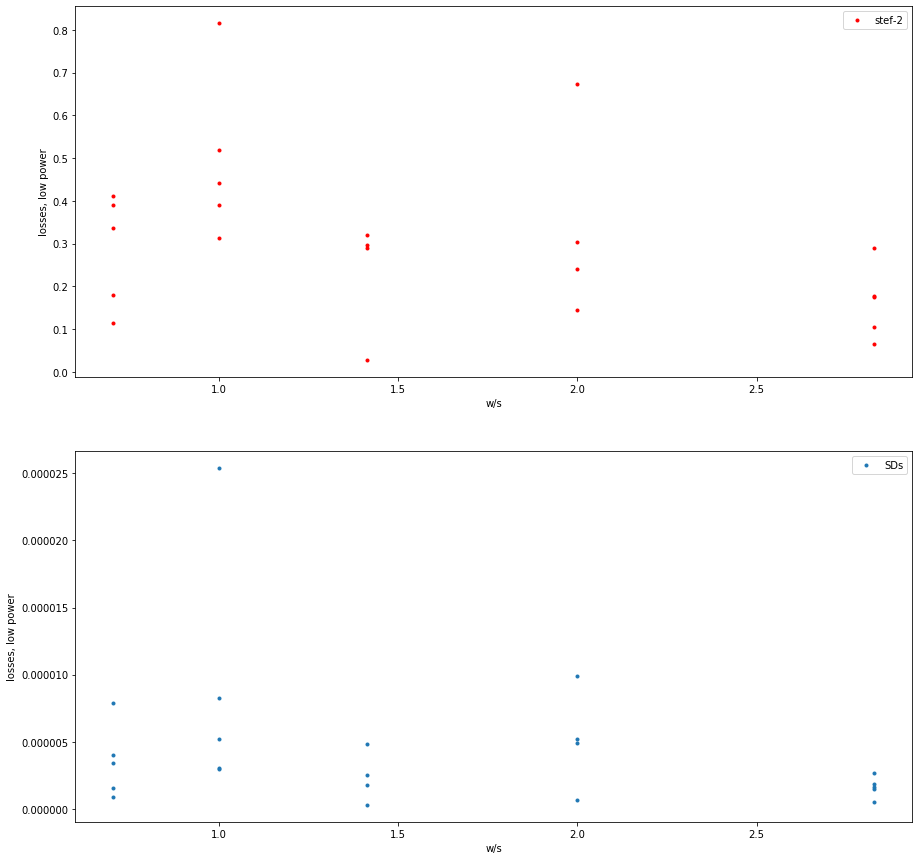

In [92]:
#some statistical analysis
data2_Qi = np.delete(measured_data2_Qi_lp, 21)
data1_Qi = np.delete(measured_data1_Qi_lp, 21)
data2_Qi = np.delete(data2_Qi, 3,0)
data1_Qi = np.delete(data1_Qi, 3,0)
loss1 = 1/data1_Qi
loss2 = 1/data2_Qi
ws = np.delete(data_ws, 21)
ws = np.delete(ws, 3)

#means:
mean_loss = (loss1 + loss2)/2
sd_loss = np.zeros(len(mean_loss))
for i in range(len(mean_loss)):
    sd_loss[i] = np.sqrt((loss1[i] - mean_loss[i])**2 + (loss2[i] - mean_loss[i])**2)
#se = sd_loss/np.sqrt(2)

print('mean losses:', mean_loss)
print('mean SD:', np.mean(sd_loss))
print('mean SD/mu:', np.mean(sd_loss/mean_loss))

fig, (ax1, ax2) = plt.subplots(2 , 1, figsize=(15,15))
#ax1.plot(ws, loss1, 'b.', label='stef-1')
ax1.plot(ws, sd_loss/mean_loss, 'r.', label='stef-2')
#ax2.plot(ws, mean_loss, '.', label='means')
ax2.plot(ws, sd_loss, '.', label='SDs')
#ax2.plot(ws, se, '.', label='SE of the mean')
ax1.set(ylabel = 'losses, low power', xlabel = 'w/s')
ax2.set(ylabel = 'losses, low power', xlabel = 'w/s')
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

[9.428090333333333 5.857864476360521 2.928931812710041 2.5
 5.857863625420082 7.387960653199153 4.714045333333334 14.775921306398306
 3.3333333333333335 8.284270113121204 4.142135730746266 10.0
 6.666666666666667 4.142135203007193 2.071067865373133 10.448154062621093
 5.0 3.6939803265995765 2.928932341733654 5.224077216009563
 8.284271461492532 13.333333333333334 3.535534]
mean SD: 30071.680433063397


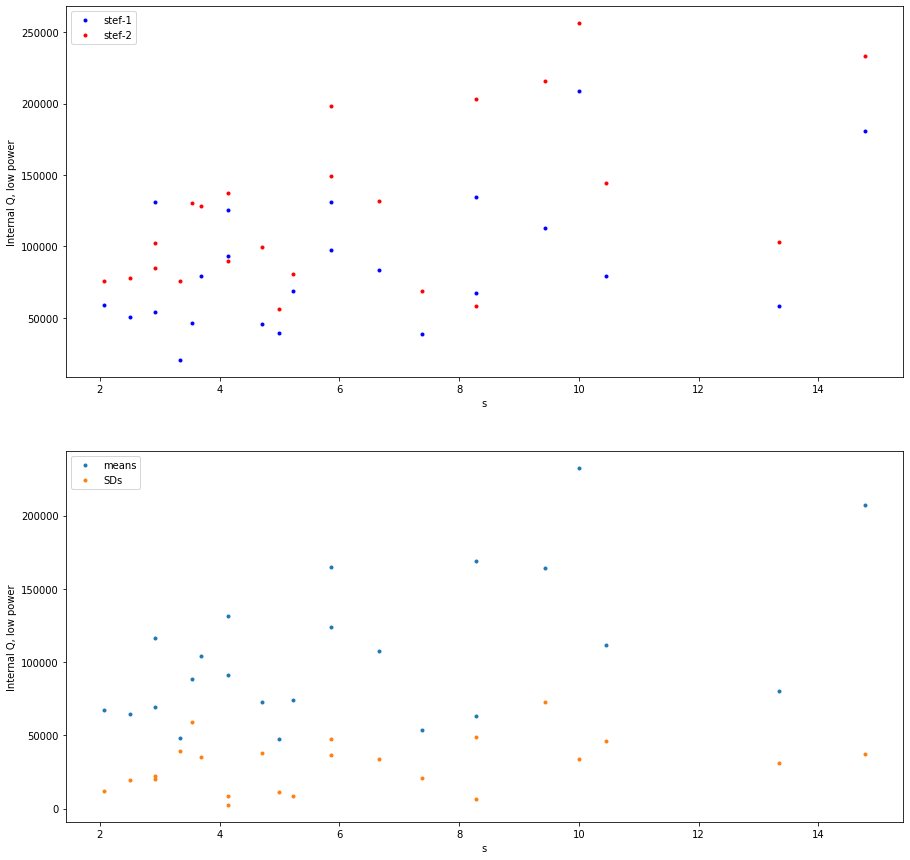

In [91]:
#some statistical analysis
data2_Qi = np.delete(measured_data2_Qi_lp, 21)
data1_Qi = np.delete(measured_data1_Qi_lp, 21)
data2_Qi = np.delete(data2_Qi, 3,0)
data1_Qi = np.delete(data1_Qi, 3,0)
s = np.delete(data_s, 21)
s = np.delete(s, 3)
print(s)
#means:
mean_Qi_lp = (data1_Qi + data2_Qi)/2
sd_Qi_lp = np.zeros(len(mean_Qi_lp))
for i in range(len(mean_Qi_lp)):
    sd_Qi_lp[i] = np.sqrt(((data1_Qi[i] - mean_Qi_lp[i])**2 + (data2_Qi[i] - mean_Qi_lp[i])**2))
se = sd_Qi_lp/np.sqrt(2)

print('mean SD:', np.mean(sd_Qi_lp))


fig, (ax1, ax2) = plt.subplots(2 , 1, figsize=(15,15))
ax1.plot(s, data1_Qi, 'b.', label='stef-1')
ax1.plot(s, data2_Qi, 'r.', label='stef-2')
ax2.plot(s, mean_Qi_lp, '.', label='means')
ax2.plot(s, sd_Qi_lp, '.', label='SDs')
#ax2.plot(s, se, '.', label='SE of the mean')
ax1.set(ylabel = 'Internal Q, low power', xlabel = 's')
ax2.set(ylabel = 'Internal Q, low power', xlabel = 's')
ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

The cells below are used to predict shifts from the predicted frequencies caused by kinetic inductance 

Calculated frequencies with correction: [ 4.86325134  5.22562953  5.29733832  5.68829952  5.86630375  6.12073835
  6.07191511  6.42465969  6.73401674  6.79614999  7.38692924  7.69577185
  7.95466721  7.94823788  8.26339659  8.6285409   8.54663188  9.13947454
  8.47618242  9.65224424  9.15114808 10.163873   10.47031883 10.53369488
 10.81847991]


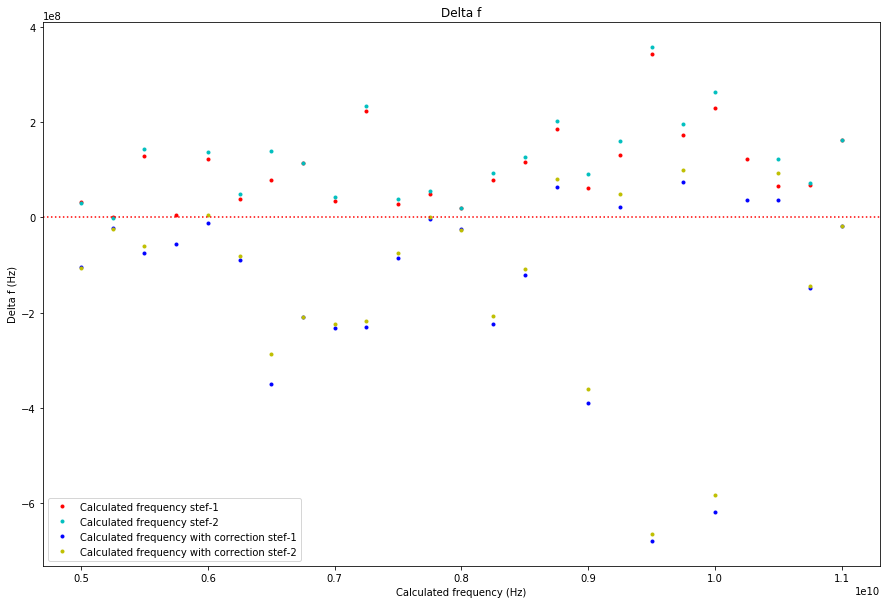

In [223]:
#### (material) constants
mu_0= 4*np.pi*1e-7
epsilon_0 = 8.854187e-12
epsilon = 6.34 #arithmatic mean between 11.68 and 1
Lambda = 47e-9 #the penetration depth of Nb at T \approx 0 is around 50 nm (https://journals.aps.org/pr/abstract/10.1103/PhysRev.139.A1515)
d = 100e-9 #thickness of the Nb film is 100nm
#C = [144.178e-12, 194.45e-12, 159.286e-12, 159.429e-12, 176.067e-12, 159.31e-12, 130.575e-12, 144.109e-12, 130.657e-12, 144e-12, 144e-12, 144e-12, 144e-12,144e-12, 144e-12, 144e-12, 144e-12, 144e-12,144e-12, 144e-12, 144e-12, 144e-12, 144e-12,144e-12, 144e-12]
l = 299792458/(4*data_f*1e9)/2.5249
w = data_w*1e-6
s = data_s*1e-6
k = w/(w+2*s)
kk = (1-k**2)**(1/2)
K = np.zeros(len(k))
KK = np.zeros(len(k))
g = np.zeros(len(k))
f = np.zeros(len(k))
L = np.zeros(len(k))
L_m = np.zeros(len(k))
L_k = np.zeros(len(k))
C = np.zeros(len(k))
for i in range(len(k)):
    K[i] = special.ellipk(k[i])
    KK[i] = special.ellipk(kk[i])
    g[i] = 1/(2*k[i]**2*K[i]**2)*(-np.log(d/(4*w[i]))-(w[i]/(w[i]+2*s[i]))*np.log(d/(4*(w[i]+2*s[i])))+2*(w[i]+s[i])/(w[i]+2*s[i])*np.log(s[i]/(w[i]+s[i])))
    L_k[i] = mu_0*Lambda**2/(d*w[i])*g[i] #should be in Henry
    L_m[i] = mu_0/4*KK[i]/K[i]
    L[i] = L_k[i] + L_m[i]
    C[i] = mu_0*epsilon_0*epsilon/L_m[i]#4*epsilon*epsilon_0*K[i]/KK[i]
    f[i] = 1/(4*l[i]*np.sqrt(L[i]*C[i]))

print('Calculated frequencies with correction:', f*1e-9)
fig = plt.figure(figsize=(15,10))
plt.xlabel('Calculated frequency (Hz)')
plt.ylabel('Delta f (Hz)')
plt.title('Delta f')
plt.plot(data_f*1e9, (data_f*1e9 - measured_data1_f), 'r.', label='Calculated frequency stef-1')
plt.plot(data_f*1e9, (data_f*1e9 - measured_data2_f), 'c.', label='Calculated frequency stef-2')
plt.plot(data_f*1e9, (f-measured_data1_f), 'b.', label='Calculated frequency with correction stef-1')
plt.plot(data_f*1e9, (f-measured_data2_f), 'y.', label='Calculated frequency with correction stef-2')
plt.axhline(0, color='r', linestyle=':')
plt.legend(loc='lower left')
plt.show()

The cells below are for plotting the design parameters and the measurement outcomes in order to try to understand which design parameters could possibly explain experimental observations (e.g. shift from the calculated frequency, internal quality factor (at low power)). 

The results are summarised in the table below. Not many relations were found. The main thing we learn from the plots is that the frequency 'error' increases when we make distances on the chip smaller (w, s, w+2s).

Furthermore, resonators with a larger frequency 'error' usually also have a lower internal quality factor.

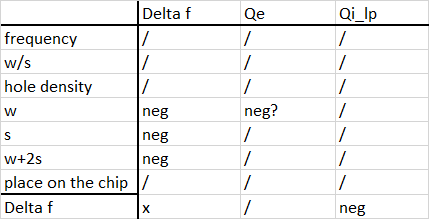

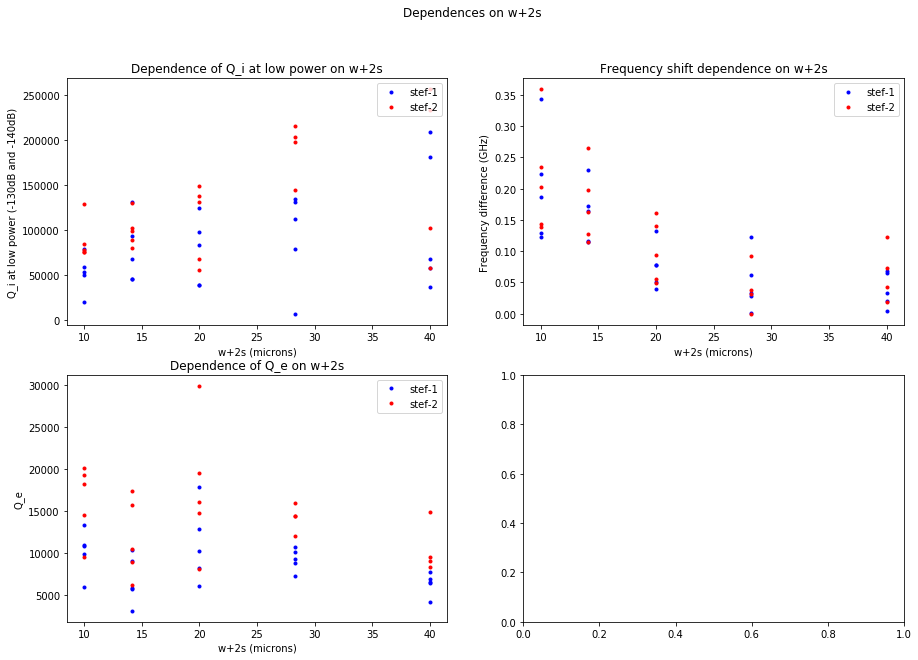

In [144]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Dependences on w+2s')

ax1.set_title('Dependence of Q_i at low power on w+2s')
ax1.set(xlabel='w+2s (microns)', ylabel='Q_i at low power (-130dB and -140dB)')
ax1.plot(data_w2s, measured_data1_Qi_lp, 'b.', label='stef-1')
ax1.plot(data_w2s, measured_data2_Qi_lp, 'r.', label='stef-2')
ax1.legend(loc='upper right')

ax2.set(xlabel='w+2s (microns)', ylabel='Frequency difference (GHz)')
ax2.set_title('Frequency shift dependence on w+2s')
ax2.plot(data_w2s, data_f-measured_data1_f*1e-9, 'b.', label='stef-1')
ax2.plot(data_w2s, data_f-measured_data2_f*1e-9, 'r.', label='stef-2')
ax2.legend(loc='upper right')

ax3.set(xlabel='w+2s (microns)', ylabel='Q_e')
ax3.set_title('Dependence of Q_e on w+2s')
ax3.plot(data_w2s, measured_data1_Qe, 'b.', label='stef-1')
ax3.plot(data_w2s, measured_data2_Qe, 'r.', label='stef-2')
ax3.legend(loc='upper right')

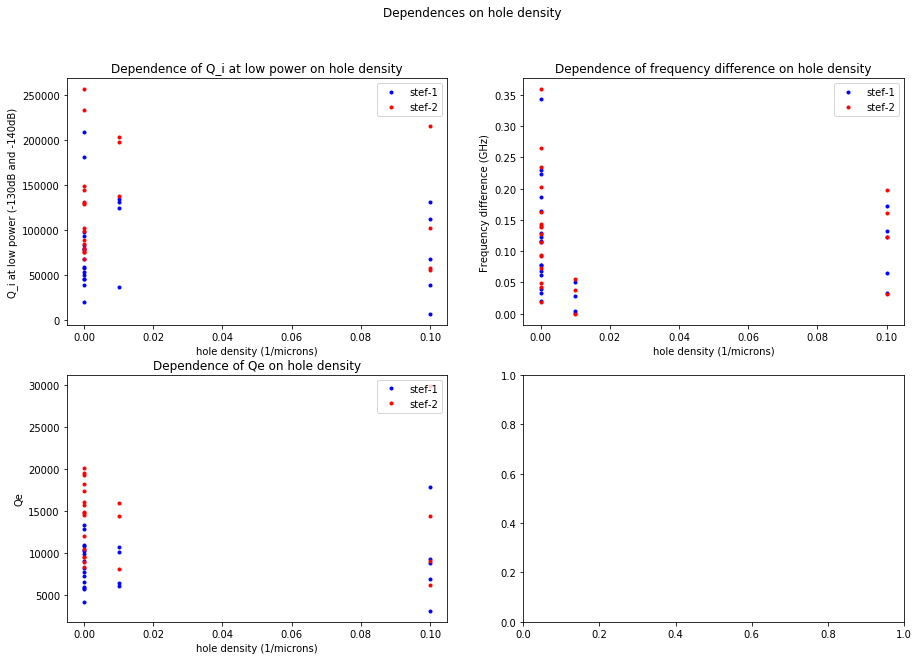

In [159]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Dependences on hole density')

ax1.set_title('Dependence of Q_i at low power on hole density')
ax1.set(xlabel='hole density (1/microns)', ylabel='Q_i at low power (-130dB and -140dB)')
ax1.plot(data_hd, measured_data1_Qi_lp, 'b.', label='stef-1')
ax1.plot(data_hd, measured_data2_Qi_lp, 'r.', label='stef-2')
ax1.legend(loc='upper right')

ax2.set(xlabel='hole density (1/microns)', ylabel='Frequency difference (GHz)')
ax2.set_title('Dependence of frequency difference on hole density')
ax2.plot(data_hd, data_f-measured_data1_f*1e-9, 'b.', label='stef-1')
ax2.plot(data_hd, data_f-measured_data2_f*1e-9, 'r.', label='stef-2')
ax2.legend(loc='upper right')

ax3.set(xlabel='hole density (1/microns)', ylabel='Qe')
ax3.set_title('Dependence of Qe on hole density')
ax3.plot(data_hd, measured_data1_Qe, 'b.', label='stef-1')
ax3.plot(data_hd, measured_data2_Qe, 'r.', label='stef-2')
ax3.legend(loc='upper right')



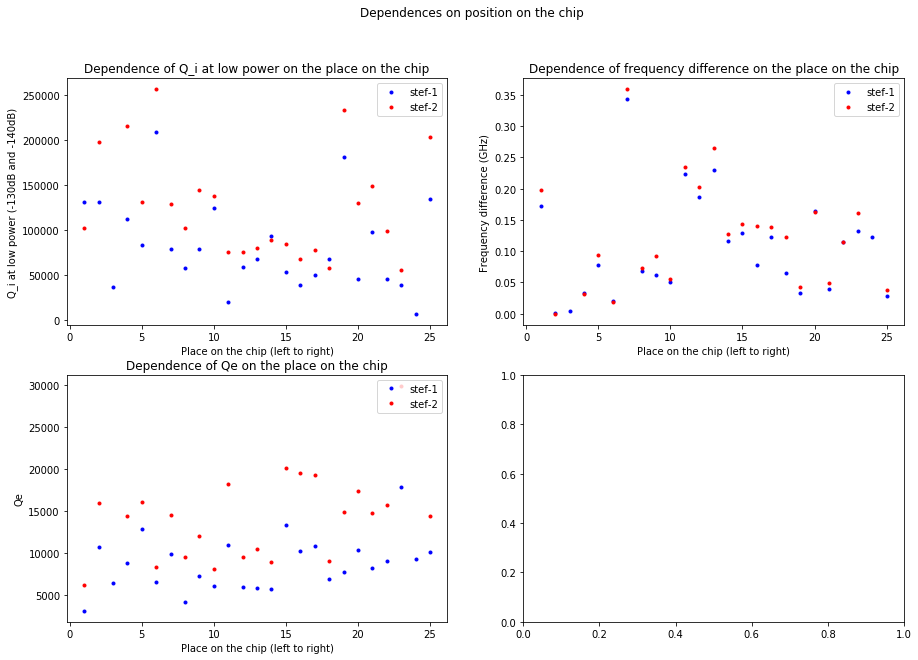

In [160]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Dependences on position on the chip')

ax1.set_title('Dependence of Q_i at low power on the place on the chip')
ax1.set(xlabel='Place on the chip (left to right)', ylabel='Q_i at low power (-130dB and -140dB)')
ax1.plot(data_position, measured_data1_Qi_lp, 'b.', label='stef-1')
ax1.plot(data_position, measured_data2_Qi_lp, 'r.', label='stef-2')
ax1.legend(loc='upper right')

ax2.set(xlabel='Place on the chip (left to right)', ylabel='Frequency difference (GHz)')
ax2.set_title('Dependence of frequency difference on the place on the chip')
ax2.plot(data_position, data_f-measured_data1_f*1e-9, 'b.', label='stef-1')
ax2.plot(data_position, data_f-measured_data2_f*1e-9, 'r.', label='stef-2')
ax2.legend(loc='upper right')

ax3.set(xlabel='Place on the chip (left to right)', ylabel='Qe')
ax3.set_title('Dependence of Qe on the place on the chip')
ax3.plot(data_position, measured_data1_Qe, 'b.', label='stef-1')
ax3.plot(data_position, measured_data2_Qe, 'r.', label='stef-2')
ax3.legend(loc='upper right')

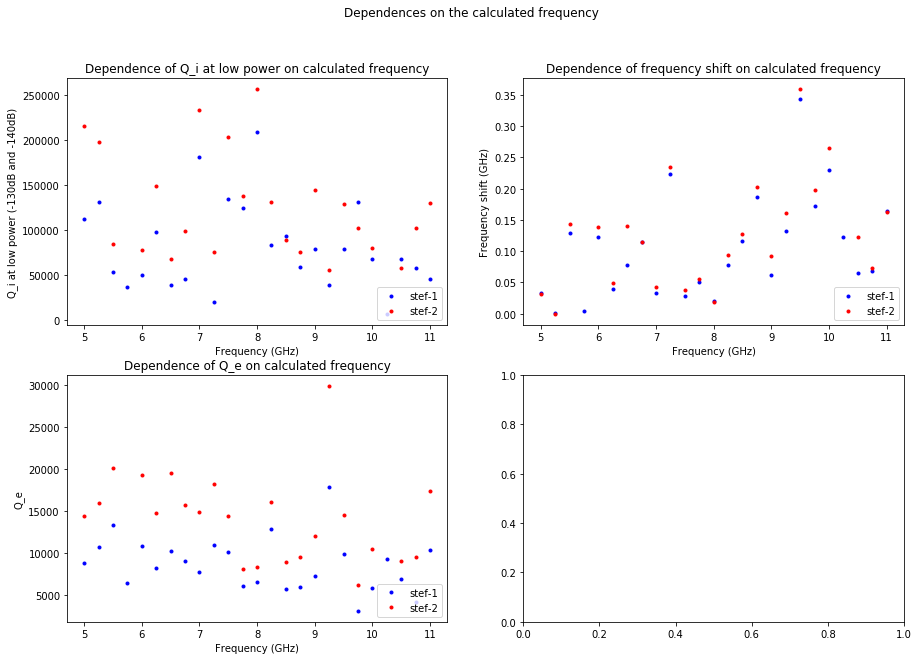

In [162]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Dependences on the calculated frequency')

ax1.set_title('Dependence of Q_i at low power on calculated frequency')
ax1.set(xlabel='Frequency (GHz)', ylabel='Q_i at low power (-130dB and -140dB)')
ax1.plot(data_f, measured_data1_Qi_lp, 'b.', label='stef-1')
ax1.plot(data_f, measured_data2_Qi_lp, 'r.', label='stef-2')
ax1.legend(loc='lower right')

ax2.set(xlabel='Frequency (GHz)', ylabel='Frequency shift (GHz)')
ax2.set_title('Dependence of frequency shift on calculated frequency')
ax2.plot(data_f, data_f-measured_data1_f*1e-9, 'b.', label='stef-1')
ax2.plot(data_f, data_f-measured_data2_f*1e-9, 'r.', label='stef-2')
ax2.legend(loc='lower right')

ax3.set(xlabel='Frequency (GHz)', ylabel='Q_e')
ax3.set_title('Dependence of Q_e on calculated frequency')
ax3.plot(data_f, measured_data1_Qe, 'b.', label='stef-1')
ax3.plot(data_f, measured_data2_Qe, 'r.', label='stef-2')
ax3.legend(loc='lower right')

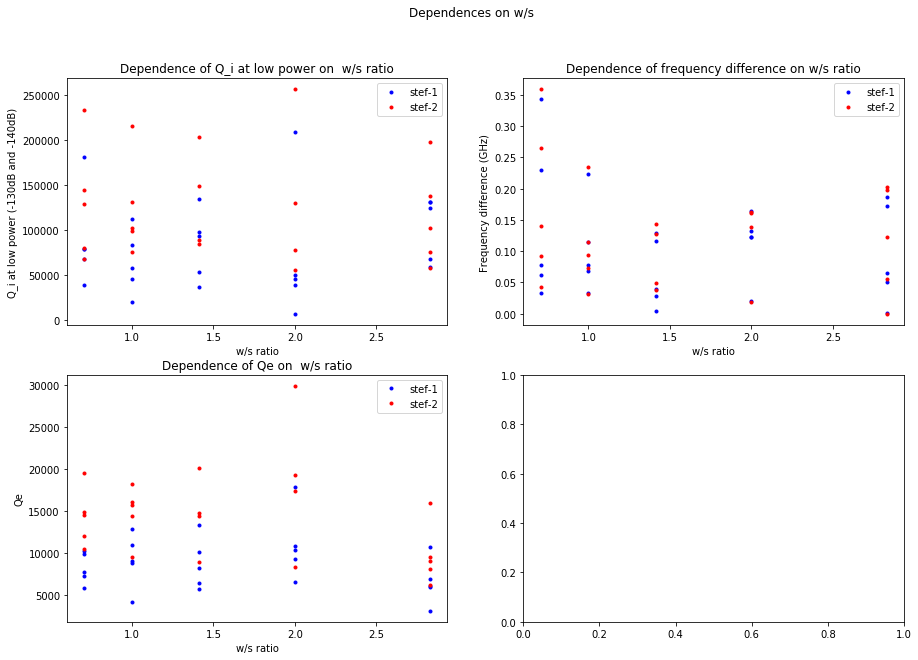

In [163]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Dependences on w/s')

ax1.set_title('Dependence of Q_i at low power on  w/s ratio')
ax1.set(xlabel='w/s ratio', ylabel='Q_i at low power (-130dB and -140dB)')
ax1.plot(data_ws, measured_data1_Qi_lp, 'b.', label='stef-1')
ax1.plot(data_ws, measured_data2_Qi_lp, 'r.', label='stef-2')
ax1.legend(loc='upper right')

ax2.set(xlabel='w/s ratio', ylabel='Frequency difference (GHz)')
ax2.set_title('Dependence of frequency difference on w/s ratio')
ax2.plot(data_ws, data_f-measured_data1_f*1e-9, 'b.', label='stef-1')
ax2.plot(data_ws, data_f-measured_data2_f*1e-9, 'r.', label='stef-2')
ax2.legend(loc='upper right')

ax3.set(xlabel='w/s ratio', ylabel='Qe')
ax3.set_title('Dependence of Qe on  w/s ratio')
ax3.plot(data_ws, measured_data1_Qe, 'b.', label='stef-1')
ax3.plot(data_ws, measured_data2_Qe, 'r.', label='stef-2')
ax3.legend(loc='upper right')

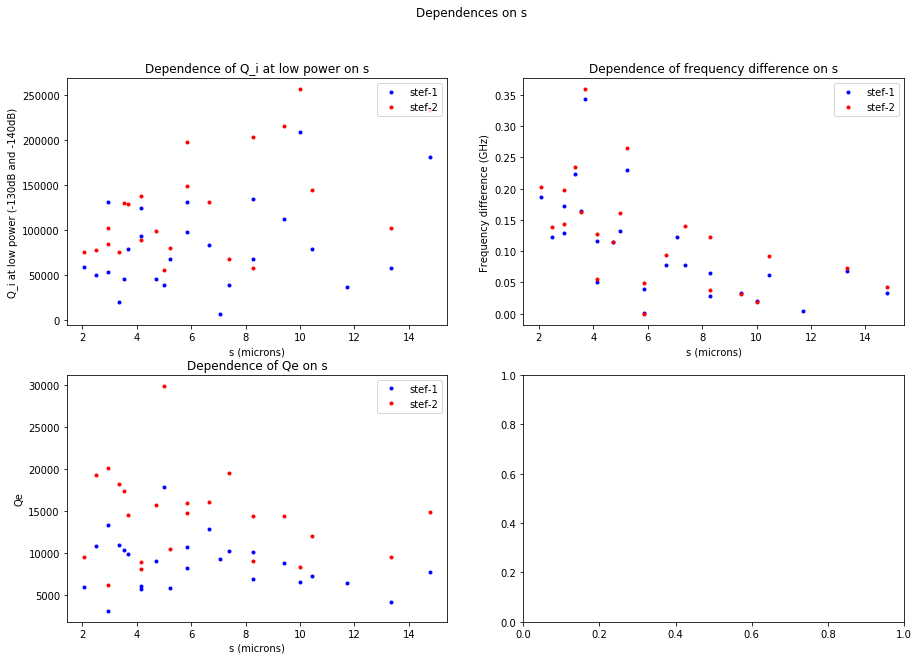

In [165]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Dependences on s')

ax1.set_title('Dependence of Q_i at low power on s')
ax1.set(xlabel='s (microns)', ylabel='Q_i at low power (-130dB and -140dB)')
ax1.plot(data_s, measured_data1_Qi_lp, 'b.', label='stef-1')
ax1.plot(data_s, measured_data2_Qi_lp, 'r.', label='stef-2')
ax1.legend(loc='upper right')

ax2.set(xlabel='s (microns)', ylabel='Frequency difference (GHz)')
ax2.set_title('Dependence of frequency difference on s')
ax2.plot(data_s, data_f-measured_data1_f*1e-9, 'b.', label='stef-1')
ax2.plot(data_s, data_f-measured_data2_f*1e-9, 'r.', label='stef-2')
ax2.legend(loc='upper right')

ax3.set(xlabel='s (microns)', ylabel='Qe')
ax3.set_title('Dependence of Qe on s')
ax3.plot(data_s, measured_data1_Qe, 'b.', label='stef-1')
ax3.plot(data_s, measured_data2_Qe, 'r.', label='stef-2')
ax3.legend(loc='upper right')

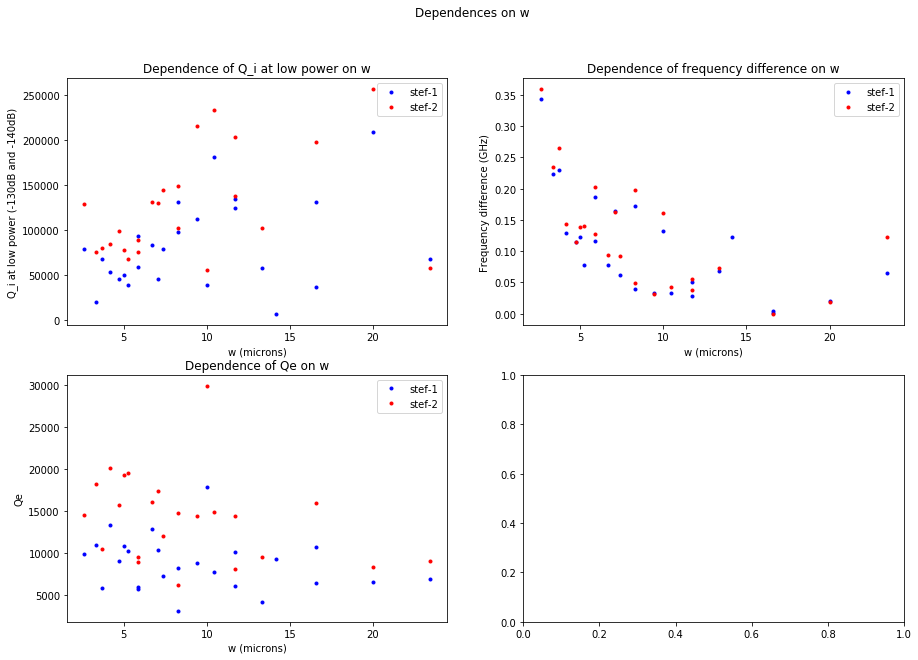

In [166]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.suptitle('Dependences on w')

ax1.set_title('Dependence of Q_i at low power on w')
ax1.set(xlabel='w (microns)', ylabel='Q_i at low power (-130dB and -140dB)')
ax1.plot(data_w, measured_data1_Qi_lp, 'b.', label='stef-1')
ax1.plot(data_w, measured_data2_Qi_lp, 'r.', label='stef-2')
ax1.legend(loc='upper right')

ax2.set(xlabel='w (microns)', ylabel='Frequency difference (GHz)')
ax2.set_title('Dependence of frequency difference on w')
ax2.plot(data_w, data_f-measured_data1_f*1e-9, 'b.', label='stef-1')
ax2.plot(data_w, data_f-measured_data2_f*1e-9, 'r.', label='stef-2')
ax2.legend(loc='upper right')

ax3.set(xlabel='w (microns)', ylabel='Qe')
ax3.set_title('Dependence of Qe on w')
ax3.plot(data_w, measured_data1_Qe, 'b.', label='stef-1')
ax3.plot(data_w, measured_data2_Qe, 'r.', label='stef-2')
ax3.legend(loc='upper right')

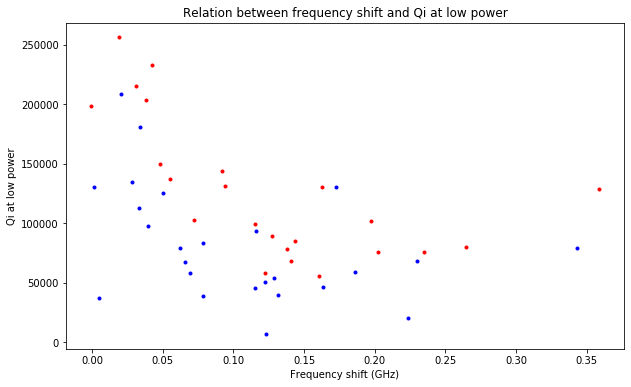

In [151]:
fig = plt.figure(figsize=(10,6))
plt.xlabel('Frequency shift (GHz)')
plt.ylabel('Qi at low power')
plt.title('Relation between frequency shift and Qi at low power')
plt.plot(data_f-measured_data1_f*1e-9, measured_data1_Qi_lp, 'b.', label='stef-1')
plt.plot(data_f-measured_data2_f*1e-9, measured_data2_Qi_lp, 'r.', label='stef-2')

[Text(0, 0.5, 'Difference in Qi_lp (percentage)')]

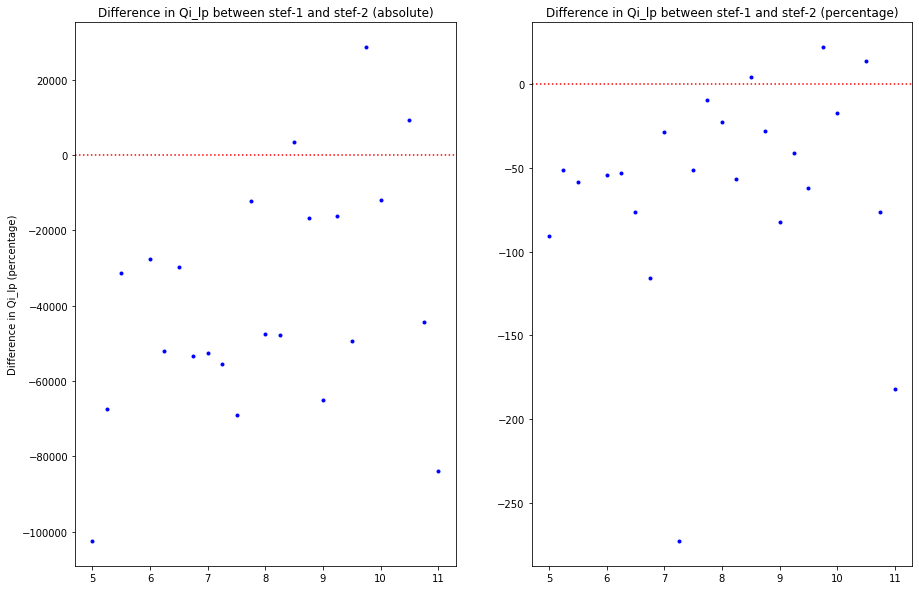

In [90]:
fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(15,10))
ax1.set(ylabel = 'Difference in Qi_lp')
ax1.set_title('Difference in Qi_lp between stef-1 and stef-2 (absolute)')
ax1.plot(data_f, (measured_data1_Qi_lp - measured_data2_Qi_lp), 'b.')
ax1.axhline(0, color='r', linestyle=':')

ax2.set_title('Difference in Qi_lp between stef-1 and stef-2 (percentage)')
ax2.plot(data_f, (measured_data1_Qi_lp - measured_data2_Qi_lp)/measured_data1_Qi_lp*100, 'b.')
ax2.axhline(0, color='r', linestyle=':')
ax1.set(ylabel = 'Difference in Qi_lp (percentage)')